In [21]:
import numpy as np
import pandas as pd
from sklearn.linear_model import RANSACRegressor,LinearRegression,LogisticRegression
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('house.csv')

In [5]:
df.columns=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRA','B','LSTAT','MEDV']

In [12]:
print(df.head())
X=df[['RM']].values
y=df[['MEDV']].values

In [10]:
ransac=RANSACRegressor(LinearRegression(),
                      max_trials=100,
                      min_samples=50,
                      loss='absolute_loss',
                      residual_threshold=5.0,
                      random_state=0)

In [11]:
ransac.fit(X,y)

RANSACRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                                n_jobs=None, normalize=False),
                is_data_valid=None, is_model_valid=None, loss='absolute_loss',
                max_skips=inf, max_trials=100, min_samples=50, random_state=0,
                residual_threshold=5.0, stop_n_inliers=inf,
                stop_probability=0.99, stop_score=inf)

In [13]:
inlier_mask=ransac.inlier_mask_
outlier_mask=np.logical_not(inlier_mask)

In [14]:
line_x=np.arange(3,10,1)

In [15]:
line_y_ransac=ransac.predict(line_x[:,np.newaxis])

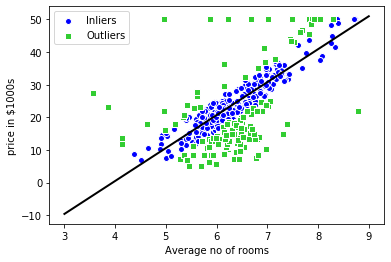

In [20]:
plt.scatter(X[inlier_mask],y[inlier_mask],c='blue',edgecolor='white',marker='o',label='Inliers')
plt.scatter(X[outlier_mask],y[outlier_mask],c='limegreen',edgecolor='white',marker='s',label='Outliers')
plt.plot(line_x,line_y_ransac,color='black',lw=2)
plt.xlabel("Average no of rooms")
plt.ylabel("price in $1000s")
plt.legend(loc='upper left')
plt.show()

In [25]:
from sklearn.preprocessing import PolynomialFeatures

In [31]:
poly=PolynomialFeatures(degree=2)
x_poly=poly.fit(X)

In [32]:
poly.fit(x_poly,y)

ValueError: Expected 2D array, got scalar array instead:
array=PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C').
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.